**Transformers**

Attention is All you need ! : https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwiUu_Xi2NqEAxXoslYBHUlFA9sQFnoECA0QAQ&url=https%3A%2F%2Farxiv.org%2Fabs%2F1706.03762&usg=AOvVaw2ceXGQohV5Kx51VSkfkG08&opi=89978449

Transformers use the concept of Attention to gain context.

In [1]:
import matplotlib.pyplot as plt

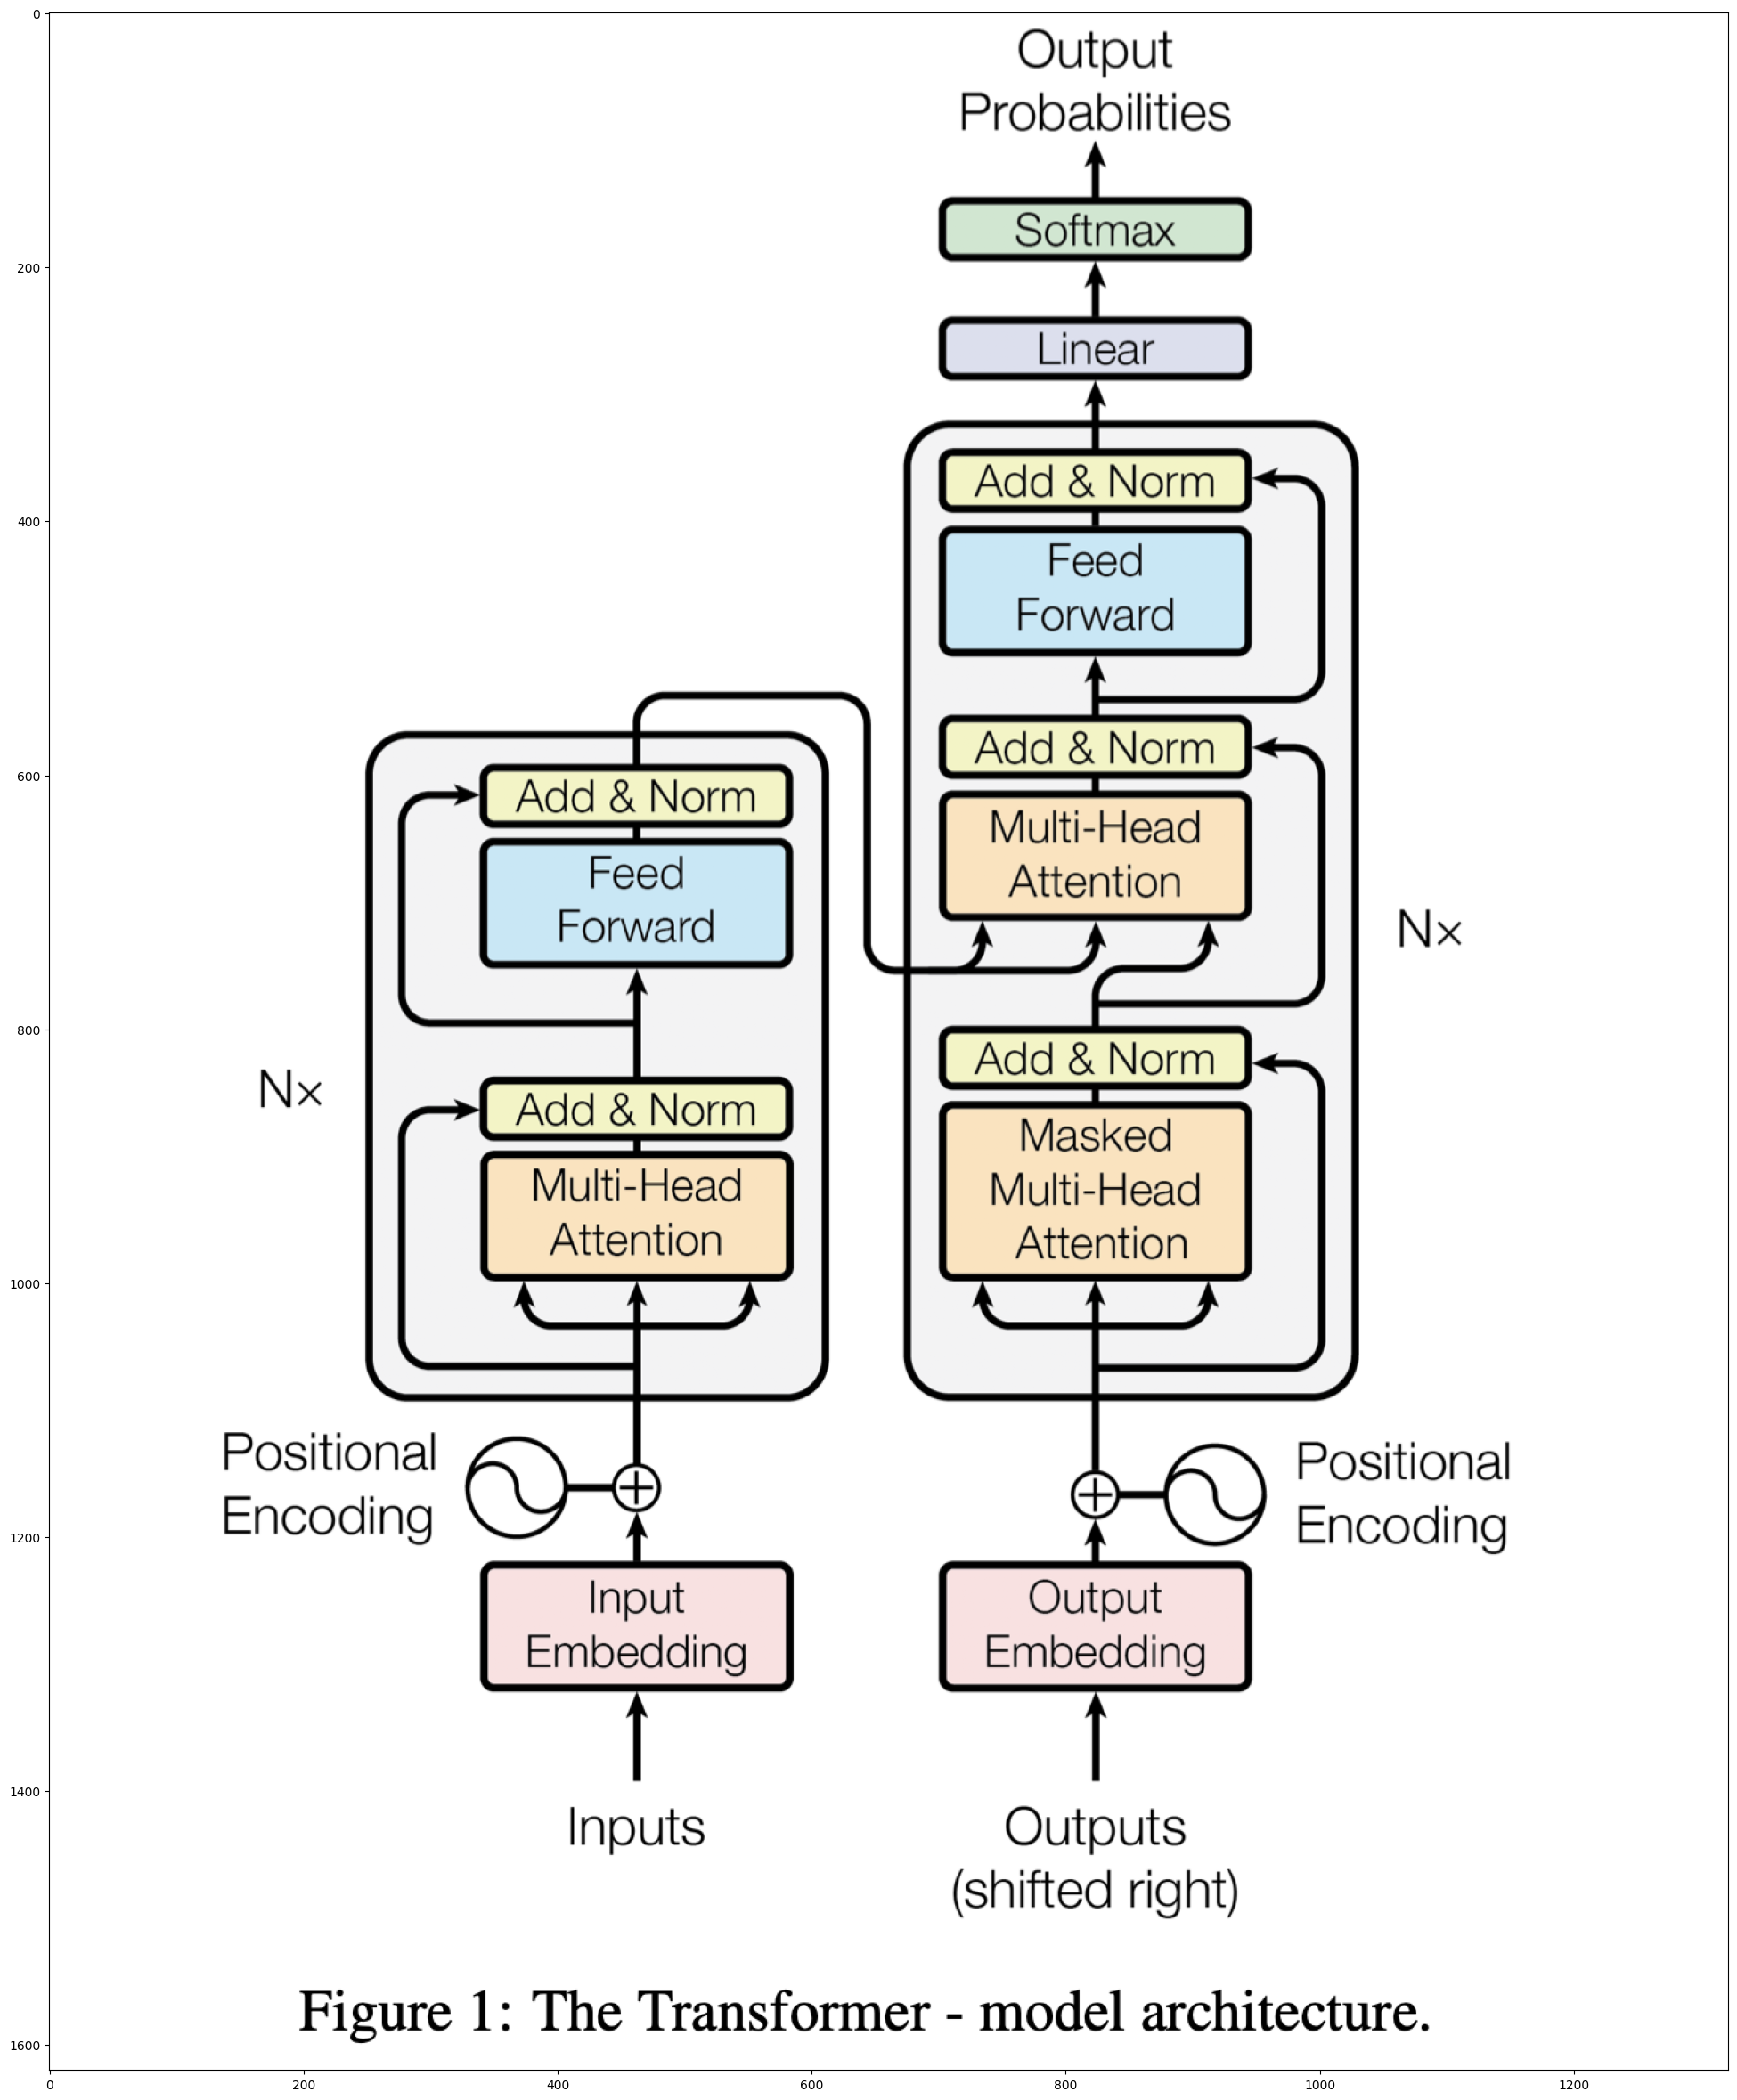

In [3]:
plt.figure(figsize=(30,30))
plt.imshow(plt.imread("Random/Transformer.png"))
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
class WordEmbeddings:

    def __init__(self,m,r):

        self.model = nn.Sequential(
            nn.Linear(m,r),
            nn.Linear(r,m),
        )
        self.loss_function = nn.CrossEntropyLoss()
        self.optimizer = optim.Adam(self.model.parameters(),lr = 0.01)
        self.unique_words = None
        self.embedding = None

    def one_hot_encode_word(self,word):

        if (word in self.unique_words):
            m = len(self.unique_words)
            endcoded_word_index = self.unique_words.index(word)
            encoded_word = np.zeros(m)
            encoded_word[endcoded_word_index] = 1
            return torch.tensor(encoded_word,dtype = torch.float32)
        else :
            print("Query word not in trained words")
    
    def generate_encoded_dataset(self,words):

        unique_words = list(set(words))
        n = len(words)
        m = len(unique_words)
        X = np.zeros((n,m))
        y = np.zeros((n,m))
        for i in range(n-1):
            j = unique_words.index(words[i])
            j_next_word = unique_words.index(words[i+1])
            X[i][j] = 1
            y[i][j_next_word] = 1 
        return torch.tensor(X,dtype = torch.float32),torch.tensor(y,dtype = torch.float32),unique_words
        
    def train(self,X,y):

        # Training
        max_epochs = 2000
        # print(f'Initial Loss {self.loss_function(self.model(X),y)}')
        for e in range(max_epochs):
            y_hat = self.model(X)
            loss = self.loss_function(y_hat,y)
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step() 
        # print(f'Final Loss {self.loss_function(self.model(X),y)}')

    def get_embedding(self,words):
        
        X,y,unique_words = self.generate_encoded_dataset(words)
        self.unique_words = unique_words
        self.train(X,y)
        params = []
        for param in self.model.parameters():
            params.append(param)
        embedding = np.array(params[0].detach()).T
        self.embedding = embedding
        return embedding
    
    def close_words(self, word, nof_words):
        if (word in self.unique_words):
            ind = self.unique_words.index(word)
            closeness = np.sum((self.embedding - self.embedding[ind])**2,axis = 1)
            word_indices = np.argsort(closeness)[0:nof_words]
            words = []
            for i in range(len(word_indices)):
                words.append(self.unique_words[word_indices[i]])
            return words
        else :
            print("Query word not in trained words") 

    def next_word(self,word):

        if (word in self.unique_words):
            softmax = nn.Softmax(dim = 0)
            out = torch.argmax(softmax(self.model(self.one_hot_encode_word(word))).detach())
            return self.unique_words[out] 
        else :
            print("Query word not in trained words") 